# Практика

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([ 1.05720883,  1.49693832,  0.2588347 , -2.03796684, -1.56585029,
       -0.65258631,  0.10657054,  0.28282957,  1.31908693,  1.11836179,
        0.78478917, -1.36450535, -0.13017742,  0.39306912,  0.77064022,
       -0.757412  ,  0.77119299, -0.99876582, -0.56387202, -1.6536548 ,
        0.83935726, -0.30949315, -1.23799112, -0.53317274, -1.03025001,
       -0.46807885,  0.52858615,  0.52868093, -0.79347178,  1.57058746,
        0.85965707,  0.13076204,  0.20253058,  0.84786859, -0.40329676,
       -1.20144681, -0.96499669,  0.24631605,  0.06176545,  2.26494224,
       -1.88884212,  0.05154329,  0.71777041, -1.25039198,  0.88134799,
       -0.03423149, -0.47392838, -2.57497872,  0.59556835,  1.38390191,
       -0.5598512 ,  0.95552072,  0.73670513,  0.08113235,  0.57650762,
        2.41188669,  1.30719819, -0.63229886,  1.15213225,  0.10260811,
        1.43293821, -1.60106266,  0.26263885,  1.38332431, -0.13863714,
       -0.39926933, -0.51374123,  1.3876983 , -1.04682504, -1.03

In [3]:
sample.dtype

dtype('float64')

In [7]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины
print(real_mean)

0.0


In [8]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины
print(real_var)

1.2898681337


### Постройте гистограмму выборки и теоретическую плотность распределения

AttributeError: Unknown property density

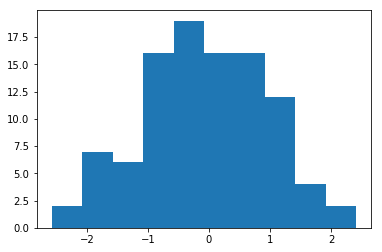

In [9]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [10]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.0651443095943
1.0571087985


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

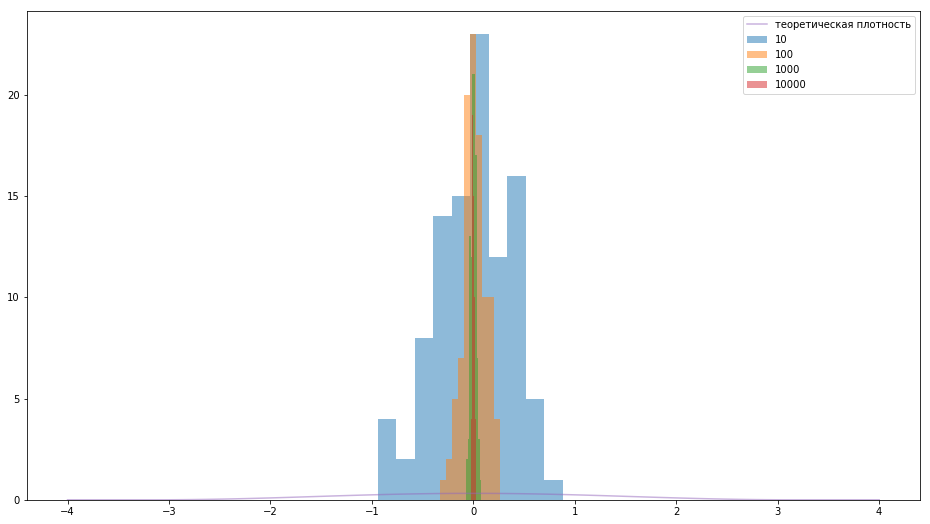

In [28]:
# ваш код тут
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100,1000,10000]:
# for N in [10]:

    means = []
    for i in range(100):
         means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

# добавляем теоретическую вероятность
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend(['теоретическая плотность', '10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# Работает хорошо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [5]:
# либо загружаем из альтернативного хранилища
# url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
# df=pd.read_csv(url)
df = pd.read_csv('telecom_churn.csv')
df.head(5)
# len(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df['analiz'] = np.where( df.churn,1,0)
N=3333

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    df.analiz.mean() - 2 * df.analiz.std() / np.sqrt(N), df.analiz.mean() + 2 * df.analiz.std() / np.sqrt(N) 
))


Доверительный интервал для среднего по цпт, если нам известна дисперсия: [0.13271790829660346, 0.15711107460168638] 


In [36]:
# Что не критично: 
# По  заданию достаточно опираться на признак df['churn'] (у вас введен абсолютно идентичный 'analiz') - избыток
# N нужно считать по параметрам фрейма (любая команда len, shape[0]) , у вас задан 3333 верно, но по заданию нужно делать расчеты относительно признака «ушел/остался» 
# Критично: 
# считать нужно доверительный интервал для total day calls по условию «ушел/остался»
# У вас расчёты  интервала относительно churn/ analiz без привязки к  условию «ушел/остался»

N = len(df)
df1 = df.loc[df.churn == True]
print(df1[['total day calls','churn']].head(5))
print("Среднее для условия «ушел»: ", df1['total day calls'].mean())
print("Дисперсия для условия «ушел»: ", df1['total day calls'].std())
print("Доверительный интервал для условия «ушел»: [{}, {}] ".format(
    df1['total day calls'].mean() - 2 * df1['total day calls'].std() / np.sqrt(N), df1['total day calls'].mean() + 2 * df1['total day calls'].std() / np.sqrt(N) 
))

df1 = df.loc[df.churn != True]
# df1[['total day calls','churn','analiz']]
print(df1[['total day calls','churn']].head(5))
print("Среднее для условия «остался»: ", df1['total day calls'].mean())
print("Дисперсия для условия «остался»: ", df1['total day calls'].std())
print("Доверительный интервал для условия «остался»: [{}, {}] ".format(
    df1['total day calls'].mean() - 2 * df1['total day calls'].std() / np.sqrt(N), df1['total day calls'].mean() + 2 * df1['total day calls'].std() / np.sqrt(N) 
))

    total day calls  churn
10              137   True
15               67   True
21               89   True
33              118   True
41               85   True
Среднее для условия «ушел»:  101.33540372670808
Дисперсия для условия «ушел»:  21.58230721307551
Доверительный интервал для условия «ушел»: [100.58773328949944, 102.08307416391672] 
   total day calls  churn
0              110  False
1              123  False
2              114  False
3               71  False
4              113  False
Среднее для условия «остался»:  100.28315789473685
Дисперсия для условия «остался»:  19.801156951805503
Доверительный интервал для условия «остался»: [99.59719139777104, 100.96912439170265] 


In [17]:
import pandas_profiling  #### ACHTUNG!!!
profile = df2.profile_report()
profile